In [1]:
import numpy as np
import glob, PIL
import os
import pathlib
import random
import cv2
import itertools
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

# Data Understanding

In [3]:
x_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [4]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

LABEL:  9


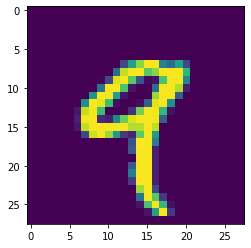

In [5]:
plt.imshow(x_train[4])
print("LABEL: ", y_train[4])

In [6]:
len(x_train)

60000

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [11]:
x_train_flattened.shape

(60000, 784)

In [12]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Model Building

**ANN Model**

In [13]:
model1 = Sequential([
    layers.Dense(units=32, input_shape=(784,), activation="relu"),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=128, activation="relu"),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 71,146
Trainable params: 71,146
Non-trainable params: 0
_________________________________________________________________


In [15]:
model1.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
hist1 = model1.fit(x_train_flattened, y_train, epochs=10, shuffle=True, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 23s 11ms/step - loss: 0.7020 - accuracy: 0.7929 - val_loss: 0.3293 - val_accuracy: 0.9040
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3002 - accuracy: 0.9120 - val_loss: 0.2518 - val_accuracy: 0.9282
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2435 - accuracy: 0.9281 - val_loss: 0.2124 - val_accuracy: 0.9377
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2088 - accuracy: 0.9383 - val_loss: 0.1928 - val_accuracy: 0.9434
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1839 - accuracy: 0.9453 - val_loss: 0.1743 - val_accuracy: 0.9497
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1658 - accuracy: 0.9501 - val_loss: 0.1622 - val_accuracy: 0.9523
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1509 - accuracy: 0.9547 - val_loss: 0.1577 - val_accurac

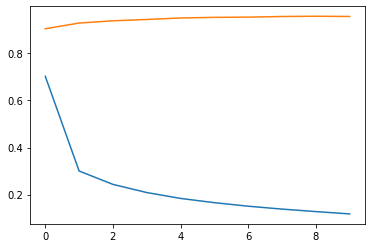

In [17]:
plt.plot(hist1.history["loss"])
plt.plot(hist1.history["val_accuracy"])

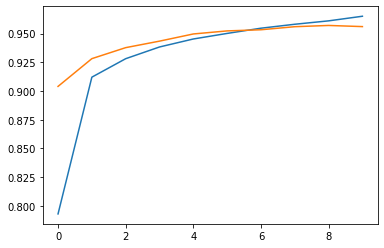

In [18]:
plt.plot(hist1.history["accuracy"])
plt.plot(hist1.history["val_accuracy"])

In [20]:
pred = model1.predict(x_test_flattened)
pred = [np.argmax(i) for i in pred]

In [21]:
accuracy_score(y_test,pred)*100

95.58

PREDICTED LABEL:  1


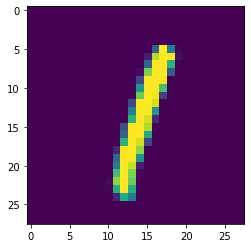

In [22]:
plt.imshow(x_test[5])
print("PREDICTED LABEL: ",pred[5])

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


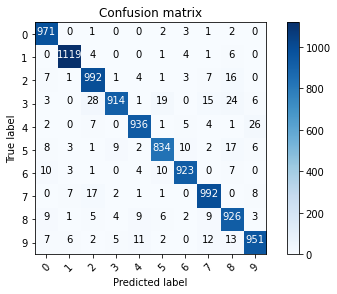

In [24]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
plot_confusion_matrix(cm=cm, classes=[0,1,2,3,4,5,6,7,8,9])

**CNN Model**

In [25]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
# Data Augumentation

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(28,28,1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [28]:
model2 = Sequential([
  data_augmentation,
  layers.Conv2D(16, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(32, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [29]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [30]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [31]:
hist2 = model2.fit(x_train, y_train, epochs=10, batch_size=10, shuffle=True, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 42s 8ms/step - loss: 0.8207 - accuracy: 0.7295 - val_loss: 0.2967 - val_accuracy: 0.9063
Epoch 2/10
4800/4800 [==============================] - 36s 7ms/step - loss: 0.4035 - accuracy: 0.8705 - val_loss: 0.1776 - val_accuracy: 0.9446
Epoch 3/10
4800/4800 [==============================] - 36s 7ms/step - loss: 0.2923 - accuracy: 0.9080 - val_loss: 0.1525 - val_accuracy: 0.9508
Epoch 4/10
4800/4800 [==============================] - 36s 8ms/step - loss: 0.2306 - accuracy: 0.9279 - val_loss: 0.1289 - val_accuracy: 0.9586
Epoch 5/10
4800/4800 [==============================] - 36s 8ms/step - loss: 0.1978 - accuracy: 0.9377 - val_loss: 0.1224 - val_accuracy: 0.9621
Epoch 6/10
4800/4800 [==============================] - 36s 8ms/step - loss: 0.1726 - accuracy: 0.9456 - val_loss: 0.0926 - val_accuracy: 0.9697
Epoch 7/10
4800/4800 [==============================] - 36s 8ms/step - loss: 0.1542 - accuracy: 0.9511 - val_loss: 0.0857 - val_ac

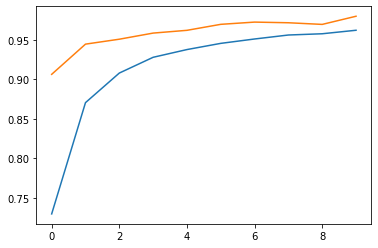

In [32]:
plt.plot(hist2.history["accuracy"])
plt.plot(hist2.history["val_accuracy"])

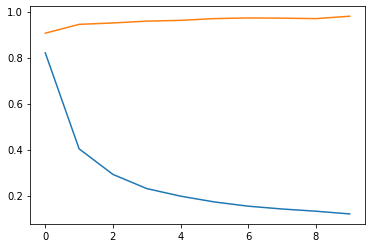

In [33]:
plt.plot(hist2.history["loss"])
plt.plot(hist2.history["val_accuracy"])

In [35]:
pred = model2.predict(x_test)
pred = [np.argmax(i) for i in pred]

In [36]:
accuracy_score(y_test,pred)*100

98.09

PREDICTED LABEL:  4


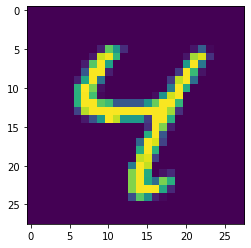

In [37]:
plt.imshow(x_test[6])
print("PREDICTED LABEL: ",pred[6])

Confusion matrix, without normalization


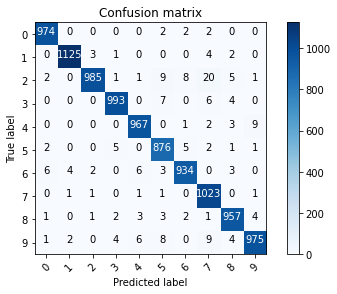

In [38]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
plot_confusion_matrix(cm=cm, classes=[0,1,2,3,4,5,6,7,8,9])